In [1]:
#Data Processing and EDA 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import mutual_info_classif
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

#Models 
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

#Metrics 
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score  
from sklearn.metrics import precision_score, recall_score


# DATA

In [2]:
train_df = pd.read_csv("credit_default_train.csv")
test_df  = pd.read_csv("credit_default_test.csv")

# Filling NAs with 0

In [3]:
#Filling NAs with 0
train_df = train_df.fillna(0)
test_df  = test_df.fillna(0)

In [44]:
train_df

,cust_id,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,18895,70000.0,1.0,3.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,53972.0,23149.0,23968.0,25559.0,26134.0,26715.0,1700.0,1500.0,2000.0,1000.0,1000.0,2000.0,0
1,25102,390000.0,2.0,2.0,2.0,26.0,2.0,2.0,2.0,0.0,0.0,0.0,185111.0,172865.0,153795.0,140387.0,128112.0,115514.0,5000.0,3000.0,5000.0,4548.0,4100.0,3300.0,0
2,28867,60000.0,1.0,1.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,2.0,21387.0,22416.0,23444.0,26038.0,28607.0,27997.0,1378.0,1406.0,3000.0,3000.0,0.0,923.0,1
3,1842,140000.0,2.0,2.0,1.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,108038.0,110216.0,84516.0,72391.0,61298.0,62193.0,4200.0,2822.0,2336.0,2588.0,2250.0,2491.0,0
4,3371,50000.0,1.0,1.0,2.0,29.0,2.0,2.0,2.0,0.0,0.0,-2.0,7881.0,10415.0,3997.0,1047.0,0.0,0.0,3000.0,0.0,1000.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5994,500000.0,1.0,2.0,2.0,36.0,1.0,-2.0,-1.0,0.0,0.0,0.0,226.0,8546.0,121867.0,116089.0,114293.0,118081.0,9125.0,126768.0,0.0,4050.0,15099.0,5015.0,0
19996,25043,30000.0,1.0,3.0,2.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,28275.0,29772.0,27821.0,28075.0,29682.0,28001.0,2000.0,2000.0,2000.0,2014.0,2000.0,2000.0,0
19997,14281,20000.0,1.0,2.0,2.0,30.0,1.0,2.0,4.0,3.0,2.0,2.0,19977.0,21359.0,20581.0,19860.0,19690.0,1735.0,2000.0,0.0,0.0,0.0,500.0,0.0,1
19998,28693,240000.0,1.0,2.0,2.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0,542827.0,508581.0,471796.0,468202.0,442401.0,419209.0,20225.0,17389.0,80167.0,15167.0,16000.0,13133.0,0


Defaulters

In [45]:
de = train_df[train_df['default.payment.next.month'] == 1]

In [46]:
de.describe()

,cust_id,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.0
mean,14864.778659,129931.508836,1.555732,1.864975,1.526733,35.265066,0.631853,0.433394,0.346171,0.238786,0.154735,0.094019,47830.896239,46689.413910,44640.804486,41430.997281,38948.915723,37659.235387,3322.840054,3265.185546,3411.683734,2900.099909,3075.807657,3347.272542,1.0
std,8688.214183,116679.119477,0.515737,0.748671,0.539898,10.215155,1.365361,1.491415,1.501042,1.504305,1.473638,1.480440,73359.191588,71025.388986,68274.638910,63788.411153,61403.799841,59554.524412,8715.631544,10066.991088,14288.012943,9366.561606,11415.226873,13193.657494,0.0
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-6676.000000,-17710.000000,-61506.000000,-65167.000000,-53007.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,7141.000000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2500.000000,2483.250000,2344.250000,1793.500000,1209.250000,932.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,14857.500000,90000.000000,2.000000,2.000000,2.000000,34.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19482.500000,19805.000000,19350.500000,18826.500000,18084.000000,17523.000000,1600.000000,1500.000000,1200.000000,1000.000000,1000.000000,1000.000000,1.0
75%,22360.750000,200000.000000,2.000000,2.000000,2.000000,42.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,58172.500000,56599.500000,53738.500000,49405.500000,46863.750000,46496.500000,3405.500000,3309.750000,3000.000000,2855.000000,3000.000000,2821.750000,1.0
max,29997.000000,740000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,613860.000000,546741.000000,578971.000000,548020.000000,547880.000000,514975.000000,244500.000000,312723.000000,508229.000000,292462.000000,332000.000000,345293.000000,1.0


In [6]:
X = train_df.iloc[:,:-1]
y = train_df.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [12]:
model = CatBoostClassifier(max_depth=2)
model.fit(X_train, y_train)

Learning rate set to 0.033658
0:	learn: 0.6762916	total: 51.4ms	remaining: 51.4s
1:	learn: 0.6611554	total: 71.1ms	remaining: 35.5s
2:	learn: 0.6466786	total: 87.5ms	remaining: 29.1s
3:	learn: 0.6326048	total: 102ms	remaining: 25.4s
4:	learn: 0.6205491	total: 115ms	remaining: 22.9s
5:	learn: 0.6082112	total: 138ms	remaining: 22.8s
6:	learn: 0.5969601	total: 168ms	remaining: 23.8s
7:	learn: 0.5865043	total: 191ms	remaining: 23.7s
8:	learn: 0.5776839	total: 211ms	remaining: 23.2s
9:	learn: 0.5685685	total: 226ms	remaining: 22.4s
10:	learn: 0.5603718	total: 240ms	remaining: 21.6s
11:	learn: 0.5525292	total: 253ms	remaining: 20.9s
12:	learn: 0.5452967	total: 269ms	remaining: 20.4s
13:	learn: 0.5390882	total: 283ms	remaining: 19.9s
14:	learn: 0.5327546	total: 297ms	remaining: 19.5s
15:	learn: 0.5269656	total: 314ms	remaining: 19.3s
16:	learn: 0.5215200	total: 334ms	remaining: 19.3s
17:	learn: 0.5167491	total: 358ms	remaining: 19.5s
18:	learn: 0.5119467	total: 386ms	remaining: 19.9s
19:	lear

In [14]:
train_predictions   = model.predict(X_train)
probabilities = pd.DataFrame(model.predict_proba(X_train))[1]
accuracy      = accuracy_score(y_train,train_predictions)
auc           = roc_auc_score(np.array(y_train),np.array(probabilities),multi_class = 'ovr')

#performances_training_acc[model] = {"Train Accuracy":accuracy}
#performances_training_auc[model] = {"Train Auc":auc}

In [23]:
performances_training_acc = accuracy
performances_training_auc =auc


In [24]:
test_predictions   = model.predict(X_test)
probabilities      = pd.DataFrame(model.predict_proba(X_test))[1]
accuracy           = accuracy_score(y_test,test_predictions)
auc                = roc_auc_score(np.array(y_test),np.array(probabilities),multi_class = 'ovr')

In [25]:
performances_test_acc = accuracy
performances_test_auc =auc

In [26]:
print("Train ACC is :" +  str(performances_training_acc) )
print("Test  ACC is :" +  str(performances_test_acc))
print("Train AUC is :" +  str(performances_training_auc) )
print("Test  AUC is :" +  str(performances_test_auc))

Train ACC is :0.8231875
Test  ACC is :0.8205
Train AUC is :0.7979991934998942
Test  AUC is :0.7745094864113566


Learning Rate - CATBOOST

In [50]:
#For Learning Rate
pip install yellowbrick --user


Note: you may need to restart the kernel to use updated packages.


Learning rate set to 0.033658
0:	learn: 0.6744911	total: 60.2ms	remaining: 1m
1:	learn: 0.6580747	total: 99.5ms	remaining: 49.6s
2:	learn: 0.6417408	total: 143ms	remaining: 47.5s
3:	learn: 0.6265269	total: 188ms	remaining: 46.9s
4:	learn: 0.6128362	total: 244ms	remaining: 48.6s
5:	learn: 0.6001200	total: 299ms	remaining: 49.5s
6:	learn: 0.5885722	total: 333ms	remaining: 47.2s
7:	learn: 0.5778666	total: 367ms	remaining: 45.5s
8:	learn: 0.5677696	total: 404ms	remaining: 44.5s
9:	learn: 0.5581542	total: 446ms	remaining: 44.1s
10:	learn: 0.5495266	total: 490ms	remaining: 44s
11:	learn: 0.5418075	total: 526ms	remaining: 43.3s
12:	learn: 0.5342179	total: 603ms	remaining: 45.8s
13:	learn: 0.5271081	total: 657ms	remaining: 46.3s
14:	learn: 0.5209830	total: 702ms	remaining: 46.1s
15:	learn: 0.5151204	total: 744ms	remaining: 45.7s
16:	learn: 0.5097789	total: 780ms	remaining: 45.1s
17:	learn: 0.5046652	total: 818ms	remaining: 44.6s
18:	learn: 0.4998779	total: 865ms	remaining: 44.7s
19:	learn: 0.4

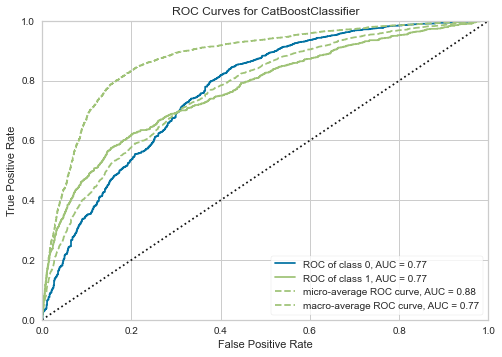

<AxesSubplot:title={'center':'ROC Curves for CatBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [52]:
from yellowbrick.classifier import ROCAUC
from yellowbrick.contrib.wrapper import wrap

catboost_model = CatBoostClassifier()
catboost_model.fit(X_train, y_train)
model = wrap(catboost_model)
visualizer = ROCAUC(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.proof()

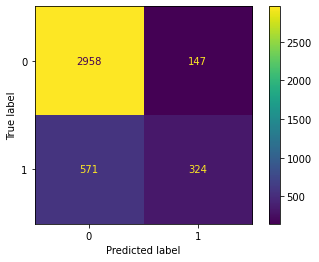

In [27]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [33]:
from sklearn import metrics

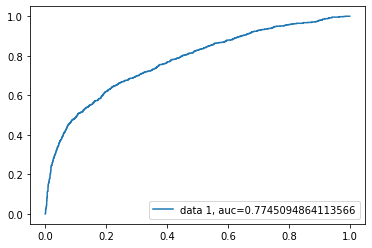

In [38]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

ROC AUC CURVE - Plotly

In [43]:
import plotly.express as px

fig = px.area(
    x=fpr, y=tpr,
    title='AUC is:' + str(roc_auc_score(y_test, y_pred_proba)),
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [15]:
auc

0.7979991934998942

In [5]:
X_train

,cust_id,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
10846,23,20000.0,2.0,2.0,1.0,41.0,0.0,0.0,0.0,0.0,0.0,-1.0,7434.0,8453.0,9249.0,9438.0,5700.0,1140.0,1300.0,3000.0,189.0,0.0,1140.0,390.0
17667,13817,100000.0,2.0,2.0,1.0,34.0,-1.0,2.0,2.0,-1.0,-1.0,-1.0,246.0,246.0,123.0,7286.0,123.0,123.0,123.0,0.0,7286.0,123.0,123.0,123.0
17313,9594,210000.0,2.0,2.0,2.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,209802.0,208421.0,190737.0,142271.0,137171.0,130687.0,8800.0,8023.0,4809.0,5001.0,5000.0,5000.0
9468,22314,170000.0,1.0,2.0,1.0,36.0,2.0,2.0,2.0,0.0,0.0,0.0,75960.0,64683.0,51184.0,37938.0,25292.0,12646.0,2000.0,0.0,0.0,0.0,0.0,173869.0
590,9387,50000.0,2.0,1.0,2.0,27.0,1.0,2.0,2.0,0.0,0.0,2.0,12884.0,14382.0,13859.0,14032.0,14852.0,14464.0,2000.0,0.0,700.0,1200.0,0.0,1365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4922,18363,330000.0,2.0,1.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,173630.0,178833.0,187820.0,190202.0,194964.0,199008.0,8000.0,12000.0,7000.0,8000.0,7287.0,7400.0
11465,8080,100000.0,1.0,2.0,1.0,34.0,2.0,2.0,2.0,0.0,0.0,2.0,84196.0,74621.0,64930.0,58433.0,50859.0,40005.0,2300.0,2000.0,4500.0,3300.0,0.0,3500.0
11889,11108,20000.0,1.0,3.0,1.0,47.0,2.0,0.0,2.0,2.0,2.0,0.0,14328.0,17196.0,17418.0,17608.0,17187.0,17528.0,3114.0,800.0,770.0,0.0,776.0,549.0
17662,10586,120000.0,2.0,3.0,1.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,102400.0,108300.0,108538.0,94833.0,49078.0,40643.0,7500.0,5000.0,4121.0,2000.0,2000.0,2000.0


In [8]:
logistic      = LogisticRegression()
neural_net    = MLPClassifier()
decision_tree = DecisionTreeClassifier(max_depth = 2)
random_forest = RandomForestClassifier(max_depth = 2)
xgb           = XGBClassifier(max_depth = 2)
gb            = GradientBoostingClassifier(max_depth = 2)
lgbm          = LGBMClassifier(max_depth = 2)
cat_boost     = CatBoostClassifier(max_depth = 2)

In [9]:
models = {
    "LOGISTIC"      : logistic,
    "DECISION_TREE" : decision_tree,
    "RANDOM_FOREST" : random_forest,
    "GB"            : gb,
    "XGB"           : xgb,
    "lgbm"          : lgbm,
    "cat_boost"     : cat_boost
}

In [10]:
#fitting the models
for model in models:
    models[model].fit(X_train,y_train)
    print(f"{model}      has been trained successfully")

LOGISTIC      has been trained successfully
DECISION_TREE      has been trained successfully
RANDOM_FOREST      has been trained successfully
GB      has been trained successfully
[11:08:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB      has been trained successfully
lgbm      has been trained successfully
Learning rate set to 0.033658
0:	learn: 0.6762916	total: 3.38ms	remaining: 3.38s
1:	learn: 0.6611554	total: 6.88ms	remaining: 3.44s
2:	learn: 0.6466786	total: 10.5ms	remaining: 3.47s
3:	learn: 0.6326048	total: 14.4ms	remaining: 3.59s
4:	learn: 0.6205491	total: 18.1ms	remaining: 3.61s
5:	learn: 0.6082112	total: 21.7ms	remaining: 3.6s
6:	learn: 0.5969601	total: 38.4ms	remaining: 5.45s
7:	learn: 0.5865043	total: 44.5ms	remaining: 

#### PERFORMANCE  AFTER JUST BASIC PROCESSING

In [11]:
#TRAIN Performance
performances_training_acc = {}
performances_training_auc = {}

for model in models:
    train_predictions   = models[model].predict(X_train)
    probabilities = pd.DataFrame(models[model].predict_proba(X_train))[1]
    accuracy      = accuracy_score(y_train,train_predictions)
    auc           = roc_auc_score(np.array(y_train),np.array(probabilities),multi_class = 'ovr')
    
    performances_training_acc[model] = {"Train Accuracy":accuracy}
    performances_training_auc[model] = {"Train Auc":auc}
#TEST ACCURACY and AUC
train_acc = pd.DataFrame(performances_training_acc)
train_auc = pd.DataFrame(performances_training_auc)



#TEST Performance
performances_test_acc = {}
performances_test_auc = {}

for model in models:
    test_predictions   = models[model].predict(X_test)
    probabilities      = pd.DataFrame(models[model].predict_proba(X_test))[1]
    accuracy           = accuracy_score(y_test,test_predictions)
    auc                = roc_auc_score(np.array(y_test),np.array(probabilities),multi_class = 'ovr')
    performances_test_acc[model] = {"Test Accuracy":accuracy}
    performances_test_auc[model] = {"Test Auc":auc}
#TEST ACCURACY and AUC
test_acc = pd.DataFrame(performances_test_acc)
test_auc = pd.DataFrame(performances_test_auc)

Accuracy = pd.concat([train_acc, test_acc])
AUC      = pd.concat([train_auc, test_auc])
metrics  = pd.concat([Accuracy ,AUC ])
metrics

,LOGISTIC,DECISION_TREE,RANDOM_FOREST,GB,XGB,lgbm,cat_boost
Train Accuracy,0.779937,0.816500,0.799000,0.821125,0.824625,0.820438,0.823187
Test Accuracy,0.776000,0.819500,0.800500,0.818750,0.822000,0.820250,0.820500
Train Auc,0.640884,0.683936,0.763360,0.788697,0.808954,0.788046,0.797999
Test Auc,0.650163,0.688946,0.764806,0.774692,0.772909,0.773454,0.774509


In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
model = CatBoostClassifier(max_depth =2)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# report performance
print('AUC: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

AUC: 0.775 (0.011)


# Now Reading the DATA again and Filling NAs with Mean and Mode

In [11]:
train_df = pd.read_csv("credit_default_train.csv")
test_df  = pd.read_csv("credit_default_test.csv")

In [12]:
#Categorical Variables 

cat_vars = train_df[['SEX', 'EDUCATION','MARRIAGE','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

In [13]:
# List of numerical and catergorical variables
num_vars = ['LIMIT_BAL', 'AGE',
            'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
            'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
cat_vars = ['SEX', 'EDUCATION', 'MARRIAGE',
            'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [14]:
X = train_df.iloc[:,:-1]
y = train_df.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1, stratify = y)

In [15]:
for column in X_train:
    if X_train[column].isnull().any():
         if(column in cat_vars):
            X_train[column]=X_train[column].fillna(X_train[column].mode()[0])


In [16]:
X_train.isna().sum()

cust_id        0
LIMIT_BAL    136
SEX            0
EDUCATION      0
MARRIAGE       0
AGE          148
PAY_0          0
PAY_2          0
PAY_3          0
PAY_4          0
PAY_5          0
PAY_6          0
BILL_AMT1    135
BILL_AMT2    160
BILL_AMT3    123
BILL_AMT4    112
BILL_AMT5    132
BILL_AMT6    151
PAY_AMT1     147
PAY_AMT2     133
PAY_AMT3     154
PAY_AMT4     140
PAY_AMT5     123
PAY_AMT6     134
dtype: int64

In [17]:
for column in X_train:
    if X_train[column].isnull().any():
         if(column in num_vars):
            X_train[column]=X_train[column].fillna(X_train[column].mean())


In [18]:
for column in X_test:
    if X_test[column].isnull().any():
         if(column in num_vars):
            X_test[column]=X_test[column].fillna(X_train[column].mean())


In [19]:
for column in X_test:
    if X_test[column].isnull().any():
         if(column in cat_vars):
            X_test[column]=X_test[column].fillna(X_train[column].mode()[0])


In [20]:
X_test.isna().sum()

cust_id      0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64

In [21]:
#fitting the models
for model in models:
    models[model].fit(X_train,y_train)
    print(f"{model}      has been trained successfully")

LOGISTIC      has been trained successfully
DECISION_TREE      has been trained successfully
RANDOM_FOREST      has been trained successfully
GB      has been trained successfully
[23:01:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB      has been trained successfully
lgbm      has been trained successfully
Learning rate set to 0.031793
0:	learn: 0.6774673	total: 6.07ms	remaining: 6.06s
1:	learn: 0.6624410	total: 12.7ms	remaining: 6.36s
2:	learn: 0.6485291	total: 23.8ms	remaining: 7.91s
3:	learn: 0.6349698	total: 31.5ms	remaining: 7.85s
4:	learn: 0.6226237	total: 37.4ms	remaining: 7.44s
5:	learn: 0.6108801	total: 47.2ms	remaining: 7.82s
6:	learn: 0.5999718	total: 54.7ms	remaining: 7.76s
7:	learn: 0.5898645	total: 62.1ms	remaining:

In [22]:
#TRAIN Performance
performances_training_acc = {}
performances_training_auc = {}

for model in models:
    train_predictions   = models[model].predict(X_train)
    probabilities = pd.DataFrame(models[model].predict_proba(X_train))[1]
    accuracy      = accuracy_score(y_train,train_predictions)
    auc           = roc_auc_score(np.array(y_train),np.array(probabilities),multi_class = 'ovr')
    
    performances_training_acc[model] = {"Train Accuracy":accuracy}
    performances_training_auc[model] = {"Train Auc":auc}
#TEST ACCURACY and AUC
train_acc = pd.DataFrame(performances_training_acc)
train_auc = pd.DataFrame(performances_training_auc)



#TEST Performance
performances_test_acc = {}
performances_test_auc = {}

for model in models:
    test_predictions   = models[model].predict(X_test)
    probabilities      = pd.DataFrame(models[model].predict_proba(X_test))[1]
    accuracy           = accuracy_score(y_test,test_predictions)
    auc                = roc_auc_score(np.array(y_test),np.array(probabilities),multi_class = 'ovr')
    performances_test_acc[model] = {"Test Accuracy":accuracy}
    performances_test_auc[model] = {"Test Auc":auc}
#TEST ACCURACY and AUC
test_acc = pd.DataFrame(performances_test_acc)
test_auc = pd.DataFrame(performances_test_auc)

Accuracy = pd.concat([train_acc, test_acc])
AUC      = pd.concat([train_auc, test_auc])
metrics  = pd.concat([Accuracy ,AUC ])
metrics

,LOGISTIC,DECISION_TREE,RANDOM_FOREST,GB,XGB,lgbm,cat_boost
Train Accuracy,0.779500,0.818357,0.798214,0.822786,0.826143,0.821714,0.823286
Test Accuracy,0.778667,0.814167,0.797333,0.816333,0.817500,0.816500,0.815000
Train Auc,0.646826,0.685925,0.765954,0.793401,0.815052,0.792708,0.804664
Test Auc,0.644554,0.682644,0.756502,0.765794,0.767195,0.767177,0.768757


# SCALING THE DATA 

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
count,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.00000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000
mean,0.500469,0.165090,0.794500,0.305714,0.513548,0.468525,0.197814,0.187186,0.18385,0.178036,0.173557,0.171364,0.183451,0.112113,0.062494,0.127444,0.120227,0.290439,0.011069,0.003434,0.005760,0.008855,0.012023,0.012215
std,0.289593,0.130524,0.254438,0.134431,0.179620,0.131742,0.110669,0.119102,0.11970,0.116812,0.113182,0.115358,0.065829,0.067667,0.040244,0.065422,0.060256,0.045677,0.030355,0.013935,0.019912,0.027428,0.037645,0.041334
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.251525,0.050000,0.500000,0.166667,0.333333,0.373333,0.100000,0.100000,0.10000,0.100000,0.100000,0.100000,0.141361,0.068789,0.037067,0.085654,0.082132,0.261787,0.001680,0.000463,0.000402,0.000400,0.000500,0.000000
50%,0.498416,0.140000,1.000000,0.333333,0.666667,0.453333,0.200000,0.200000,0.20000,0.200000,0.200000,0.200000,0.157488,0.085552,0.046966,0.102847,0.098436,0.273767,0.004148,0.001187,0.001931,0.002836,0.003865,0.003389
75%,0.751492,0.240000,1.000000,0.333333,0.666667,0.546667,0.200000,0.200000,0.20000,0.200000,0.200000,0.200000,0.196768,0.124567,0.069942,0.138726,0.130138,0.298164,0.010135,0.002969,0.004910,0.007563,0.010307,0.009479
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
#fitting the models
for model in models:
    models[model].fit(X_train,y_train)
    print(f"{model}      has been trained successfully")

LOGISTIC      has been trained successfully
DECISION_TREE      has been trained successfully
RANDOM_FOREST      has been trained successfully
GB      has been trained successfully
[23:02:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB      has been trained successfully
lgbm      has been trained successfully
Learning rate set to 0.031793
0:	learn: 0.6774673	total: 6.86ms	remaining: 6.85s
1:	learn: 0.6624410	total: 12.4ms	remaining: 6.19s
2:	learn: 0.6485291	total: 17.6ms	remaining: 5.84s
3:	learn: 0.6349698	total: 23.7ms	remaining: 5.9s
4:	learn: 0.6226237	total: 29.1ms	remaining: 5.8s
5:	learn: 0.6108801	total: 35.2ms	remaining: 5.83s
6:	learn: 0.5999718	total: 41.4ms	remaining: 5.87s
7:	learn: 0.5898645	total: 46.6ms	remaining: 5

### RESULTS AFTER SCALING 
- Only Logistic showed improvement as Tree based Models are not effected by Scaling

In [25]:
#TRAIN Performance
performances_training_acc = {}
performances_training_auc = {}

for model in models:
    train_predictions   = models[model].predict(X_train)
    probabilities = pd.DataFrame(models[model].predict_proba(X_train))[1]
    accuracy      = accuracy_score(y_train,train_predictions)
    auc           = roc_auc_score(np.array(y_train),np.array(probabilities),multi_class = 'ovr')
    
    performances_training_acc[model] = {"Train Accuracy":accuracy}
    performances_training_auc[model] = {"Train Auc":auc}
#TEST ACCURACY and AUC
train_acc = pd.DataFrame(performances_training_acc)
train_auc = pd.DataFrame(performances_training_auc)



#TEST Performance
performances_test_acc = {}
performances_test_auc = {}

for model in models:
    test_predictions   = models[model].predict(X_test)
    probabilities      = pd.DataFrame(models[model].predict_proba(X_test))[1]
    accuracy           = accuracy_score(y_test,test_predictions)
    auc                = roc_auc_score(np.array(y_test),np.array(probabilities),multi_class = 'ovr')
    performances_test_acc[model] = {"Test Accuracy":accuracy}
    performances_test_auc[model] = {"Test Auc":auc}
#TEST ACCURACY and AUC
test_acc = pd.DataFrame(performances_test_acc)
test_auc = pd.DataFrame(performances_test_auc)

Accuracy = pd.concat([train_acc, test_acc])
AUC      = pd.concat([train_auc, test_auc])
metrics  = pd.concat([Accuracy ,AUC ])
metrics

,LOGISTIC,DECISION_TREE,RANDOM_FOREST,GB,XGB,lgbm,cat_boost
Train Accuracy,0.807000,0.818357,0.798000,0.822786,0.826143,0.821643,0.823286
Test Accuracy,0.808167,0.814167,0.796333,0.816167,0.817500,0.816667,0.815000
Train Auc,0.712919,0.685925,0.765877,0.793401,0.815052,0.793420,0.804664
Test Auc,0.708885,0.682644,0.755447,0.765802,0.767195,0.767507,0.768757


# LOGISTIC WITH PCA 

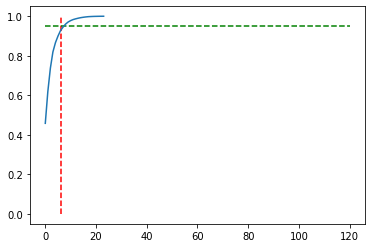

In [26]:
from sklearn.decomposition import PCA
# Decide the number of PCA components based on the retained information
pca = PCA(random_state=88)
pca.fit(X_train)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.vlines(x=6, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=120, xmin=0, colors="g", linestyles="--")
plt.plot(explained_variance)

In [36]:
id_var = ["cust_id"]  # ID
target_var = ["default.payment.next.month"]  # Target get variable
predictors = [v for v in train_df.columns if v not in id_var + target_var]


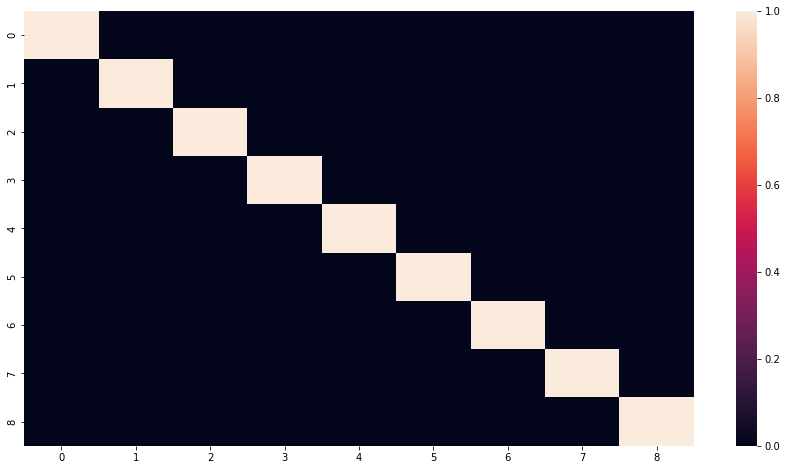

In [27]:
# Train the PCA model 
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=6)
df_train_pca = pca_final.fit_transform(X_train)
 
# Note that the above can be automated like this: (without using plot)
pca_final = PCA(0.95)
df_train_pca = pca_final.fit_transform(X_train)
 
# Check the correlations between components
corr_mat = np.corrcoef(df_train_pca.transpose())
plt.figure(figsize=[15,8])
sns.heatmap(corr_mat)
plt.show()

In [28]:
# Apply PCA model to the test data
df_test_pca = pca_final.transform(X_test)

In [31]:
# Train the Logistic Regression model
LR_PCA_Learner = LogisticRegression()
LR_PCA_Model = LR_PCA_Learner.fit(df_train_pca, y_train)

 -No Improvement (Almost same as previous results)

In [32]:
# Calculate the Area Under the Curve (AUC)
pred_test = LR_PCA_Model.predict_proba(df_test_pca)
"{:2.2}".format(roc_auc_score(y_test, pred_test[:,1]))

'0.69'

In [33]:
#fitting the models
for model in models:
    models[model].fit(df_train_pca,y_train)
    print(f"{model}      has been trained successfully")

LOGISTIC      has been trained successfully
DECISION_TREE      has been trained successfully
RANDOM_FOREST      has been trained successfully
GB      has been trained successfully
[23:22:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB      has been trained successfully
lgbm      has been trained successfully
Learning rate set to 0.031793
0:	learn: 0.6779470	total: 8.27ms	remaining: 8.26s
1:	learn: 0.6635484	total: 15.3ms	remaining: 7.62s
2:	learn: 0.6507375	total: 20.7ms	remaining: 6.89s
3:	learn: 0.6377019	total: 35.1ms	remaining: 8.74s
4:	learn: 0.6259269	total: 40.2ms	remaining: 8s
5:	learn: 0.6152995	total: 47.7ms	remaining: 7.91s
6:	learn: 0.6055296	total: 54.4ms	remaining: 7.72s
7:	learn: 0.5957903	total: 68.1ms	remaining: 8.

## PCA With all the Models 
- Performance was decreased as compared to earlier (Not the best Models)

In [34]:
#TRAIN Performance
performances_training_acc = {}
performances_training_auc = {}

for model in models:
    train_predictions   = models[model].predict(df_train_pca)
    probabilities = pd.DataFrame(models[model].predict_proba(df_train_pca))[1]
    accuracy      = accuracy_score(y_train,train_predictions)
    auc           = roc_auc_score(np.array(y_train),np.array(probabilities),multi_class = 'ovr')
    
    performances_training_acc[model] = {"Train Accuracy":accuracy}
    performances_training_auc[model] = {"Train Auc":auc}
#TEST ACCURACY and AUC
train_acc = pd.DataFrame(performances_training_acc)
train_auc = pd.DataFrame(performances_training_auc)



#TEST Performance
performances_test_acc = {}
performances_test_auc = {}

for model in models:
    test_predictions   = models[model].predict(df_test_pca)
    probabilities      = pd.DataFrame(models[model].predict_proba(df_test_pca))[1]
    accuracy           = accuracy_score(y_test,test_predictions)
    auc                = roc_auc_score(np.array(y_test),np.array(probabilities),multi_class = 'ovr')
    performances_test_acc[model] = {"Test Accuracy":accuracy}
    performances_test_auc[model] = {"Test Auc":auc}
#TEST ACCURACY and AUC
test_acc = pd.DataFrame(performances_test_acc)
test_auc = pd.DataFrame(performances_test_auc)

Accuracy = pd.concat([train_acc, test_acc])
AUC      = pd.concat([train_auc, test_auc])
metrics  = pd.concat([Accuracy ,AUC ])
metrics

,LOGISTIC,DECISION_TREE,RANDOM_FOREST,GB,XGB,lgbm,cat_boost
Train Accuracy,0.800429,0.804929,0.790000,0.813571,0.817071,0.810214,0.813000
Test Accuracy,0.803167,0.799833,0.786500,0.807167,0.804500,0.809167,0.806333
Train Auc,0.695175,0.695828,0.743060,0.770341,0.790181,0.768928,0.779411
Test Auc,0.692956,0.695367,0.734739,0.736579,0.735344,0.737107,0.739037
